## Laboratory 4 - Models in credit and operational risk
**Bartłomiej Jamiołkowski 04.04.2022**

## Exercise 1

**What events that may cause losses do we consider as part of operational risk?**

As part of operational risk, losses may occur as a result of the following events:

- theft of property or information;
- robbery;
- physical and computer hacking;
- discrimination of employees;
- occupational health and safety violations resulting in accidents;
- salary claim;
- disclosure of customers' personal data;
- aggressive trading strategy to maximize commissions;
- incorrect assessment of the customer's profile;
- incorrectly constructed templates, contracts, regulations;
- physical destruction of assets as a result of random events;
- acts of vandalism or terrorism;
- software errors;
- equipment malfunction;
- telecommunications problems;
- errors when entering data into the system;
- errors in the execution, settlement and processing of transactions;
- negligence in monitoring and reporting;
- improper management of customer accounts.

**Explain the difference between the following operational risk assessment approaches: BIA, TSA and AMA.**

The difference between the BIA, TSA and AMA approaches to operational risk is visible in several areas:
- the largest banks are obliged to use only the AMA method, which means that these methods are not interchangeable in some institutions;
- calculation of required capital. In the case of the base indicator method, it is calculated as 15% of the average of the net positive interest and non-interest results from the previous 3 years. A different approach is presented by the standard method, where the required capital is determined as the sum of the results from 8 business lines weighted by coefficients. The advanced measurement method is different, which takes into account 7 categories of events for up to 8 business lines, creating 56 risk areas used to calculate the operational value at risk;
- TSA does not take into account a negative total score.

**What is the LDA method, which is used as part of the advanced measurement method for operational risk?**

The LDA (Loss Distribution Approach) method involves modeling the observed distribution of losses in order to predict the range of potential future losses. It consists of the following processes:
- estimation of the severity of losses;
- estimation of loss frequency;
- calculation of capital charge;
- calculation of confidence interval;

## Exercise 2

**Libraries used**

In [10]:
options(warn=-1)
library("readxl")
library("nortest")
library("ptsuite")
library('lubridate')
library('ggplot2')

**Data import**

In [11]:
basel_op <-  read_excel("BaselOP.xlsx")

In [12]:
head(basel_op)

ID,Date,Business Line,Risk Category,Gross Loss Amount,Recovery Amount
1,03/01/2009,AG,CPBP,8045.29,6926.03
2,06/01/2009,CB,CPBP,6689.97,5933.89
3,11/01/2009,AG,CPBP,32965.18,24815.44
4,11/01/2009,AG,CPBP,17775.68,15029.16
5,12/01/2009,RBR,EDPM,767.43,767.43
6,14/01/2009,AG,CPBP,41426.22,34513.52


**Selection of PS business line**

In [13]:
ps_basel_op <- basel_op[which(basel_op$'Business Line' == 'PS'),]

In [14]:
head(ps_basel_op)

ID,Date,Business Line,Risk Category,Gross Loss Amount,Recovery Amount
23,08/02/2009,PS,DPA,12716.87,10148.41
28,16/02/2009,PS,EPWS,2623.35,2468.11
30,17/02/2009,PS,IF,54797.76,36427.16
38,28/02/2009,PS,DPA,3781.29,3290.28
42,05/03/2009,PS,DPA,28302.43,21642.07
45,07/03/2009,PS,DPA,5574.01,5054.74


**Determination of net start (Net loss)**

In [15]:
ps_basel_op["Net Loss"] <- rep(NA, length(ps_basel_op$ID))
for(i in 1:length(ps_basel_op$ID)){
    ps_basel_op$'Net Loss'[i] = ps_basel_op$'Gross Loss Amount'[i] - ps_basel_op$'Recovery Amount'[i]
}

In [16]:
head(ps_basel_op)

ID,Date,Business Line,Risk Category,Gross Loss Amount,Recovery Amount,Net Loss
23,08/02/2009,PS,DPA,12716.87,10148.41,2568.46
28,16/02/2009,PS,EPWS,2623.35,2468.11,155.24
30,17/02/2009,PS,IF,54797.76,36427.16,18370.60
38,28/02/2009,PS,DPA,3781.29,3290.28,491.01
42,05/03/2009,PS,DPA,28302.43,21642.07,6660.36
45,07/03/2009,PS,DPA,5574.01,5054.74,519.27


**Loss turnout**

In [17]:
loss_frequency <- data.frame(
    half_of_a_year = seq(1, 20),
    number_of_loss_events = rep(0, 20)           
)

In [18]:
for(i in 1:length(ps_basel_op$Date)){
    int1 = interval(dmy("08/02/2009"), dmy("08/08/2009"))
    if(dmy(ps_basel_op$Date[i]) %within% int1 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[1] = loss_frequency$number_of_loss_events[1] + 1
    }
    int2 = interval(dmy("09/08/2009"), dmy("08/02/2010"))
    if(dmy(ps_basel_op$Date[i]) %within% int2 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[2] = loss_frequency$number_of_loss_events[2] + 1
    }
    int3 = interval(dmy("09/02/2010"), dmy("08/08/2010"))
    if(dmy(ps_basel_op$Date[i]) %within% int3 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[3] = loss_frequency$number_of_loss_events[3] + 1
    }
    int4 = interval(dmy("09/08/2010"), dmy("08/02/2011"))
    if(dmy(ps_basel_op$Date[i]) %within% int4 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[4] = loss_frequency$number_of_loss_events[4] + 1
    }
    int5 = interval(dmy("09/02/2011"), dmy("08/08/2011"))
    if(dmy(ps_basel_op$Date[i]) %within% int5 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[5] = loss_frequency$number_of_loss_events[5] + 1
    }
    int6 = interval(dmy("09/08/2011"), dmy("08/02/2012"))
    if(dmy(ps_basel_op$Date[i]) %within% int6 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[6] = loss_frequency$number_of_loss_events[6] + 1
    }
    int7 = interval(dmy("09/02/2012"), dmy("08/08/2012"))
    if(dmy(ps_basel_op$Date[i]) %within% int7 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[7] = loss_frequency$number_of_loss_events[7] + 1
    }
    int8 = interval(dmy("09/08/2012"), dmy("08/02/2013"))
    if(dmy(ps_basel_op$Date[i]) %within% int8 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[8] = loss_frequency$number_of_loss_events[8] + 1
    }
    int9 = interval(dmy("09/02/2013"), dmy("08/08/2013"))
    if(dmy(ps_basel_op$Date[i]) %within% int9 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[9] = loss_frequency$number_of_loss_events[9] + 1
    }
    int10 = interval(dmy("09/08/2013"), dmy("08/02/2014"))
    if(dmy(ps_basel_op$Date[i]) %within% int10 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[10] = loss_frequency$number_of_loss_events[10] + 1
    }
    int11 = interval(dmy("09/02/2014"), dmy("08/08/2014"))
    if(dmy(ps_basel_op$Date[i]) %within% int11 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[11] = loss_frequency$number_of_loss_events[11] + 1
    }
    int12 = interval(dmy("09/08/2014"), dmy("08/02/2015"))
    if(dmy(ps_basel_op$Date[i]) %within% int12 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[12] = loss_frequency$number_of_loss_events[12] + 1
    }
    int13 = interval(dmy("09/02/2015"), dmy("08/08/2015"))
    if(dmy(ps_basel_op$Date[i]) %within% int13 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[13] = loss_frequency$number_of_loss_events[13] + 1
    }
    int14 = interval(dmy("09/08/2015"), dmy("08/02/2016"))
    if(dmy(ps_basel_op$Date[i]) %within% int14 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[14] = loss_frequency$number_of_loss_events[14] + 1
    }
    int15 = interval(dmy("09/02/2016"), dmy("08/08/2016"))
    if(dmy(ps_basel_op$Date[i]) %within% int15 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[15] = loss_frequency$number_of_loss_events[15] + 1
    }
    int16 = interval(dmy("09/08/2016"), dmy("08/02/2017"))
    if(dmy(ps_basel_op$Date[i]) %within% int16 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[16] = loss_frequency$number_of_loss_events[16] + 1
    }
    int17 = interval(dmy("09/02/2017"), dmy("08/08/2017"))
    if(dmy(ps_basel_op$Date[i]) %within% int17 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[17] = loss_frequency$number_of_loss_events[17] + 1
    }
    int18 = interval(dmy("09/08/2017"), dmy("08/02/2018"))
    if(dmy(ps_basel_op$Date[i]) %within% int18 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[18] = loss_frequency$number_of_loss_events[18] + 1
    }
    int19 = interval(dmy("09/02/2018"), dmy("08/08/2018"))
    if(dmy(ps_basel_op$Date[i]) %within% int19 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[19] = loss_frequency$number_of_loss_events[19] + 1
    }
    int20 = interval(dmy("09/08/2018"), dmy("30/12/2018"))
    if(dmy(ps_basel_op$Date[i]) %within% int20 == TRUE & ps_basel_op$'Net Loss'[i] > 0.00){
       loss_frequency$number_of_loss_events[20] = loss_frequency$number_of_loss_events[20] + 1
    }
}

In [19]:
loss_frequency

half_of_a_year,number_of_loss_events
1,25
2,9
3,13
4,17
5,35
6,27
7,42
8,41
9,9
10,14


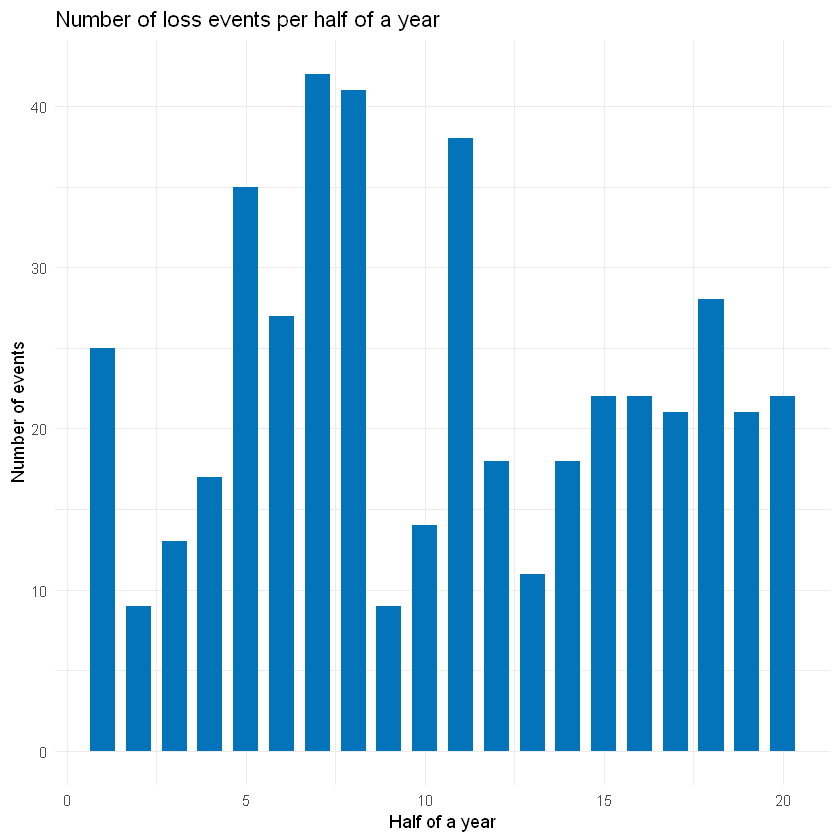

In [20]:
ggplot(loss_frequency, aes(x = half_of_a_year, y = number_of_loss_events)) +
geom_bar(stat = "identity", width=0.7, fill="#0474BA") +
ggtitle("Number of loss events per half of a year") +
ylab('Number of events') + xlab('Half of a year') +
theme_minimal()

**Fitting the best possible distribution of the number of operational events**

a) Pearson's chi-square test

H0: the data can be described by the Pearson distribution

H1: the data cannot be described by the Pearson distribution

In [21]:
chisq.test(loss_frequency$number_of_loss_events) 


	Chi-squared test for given probabilities

data:  loss_frequency$number_of_loss_events
X-squared = 84.351, df = 19, p-value = 3.27e-10


The p-value is less than 0.05, which means that H0 is rejected. The observations cannot be described by the Pearson distribution.

b) Kolmogorov-Smirnov test

H0: the data can be described by a normal distribution

H1: the data cannot be described by a normal distribution

In [22]:
ks.test(loss_frequency$number_of_loss_events, "pnorm")


	One-sample Kolmogorov-Smirnov test

data:  loss_frequency$number_of_loss_events
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


The p-value is less than 0.05, which means that H0 is rejected. The observations cannot be described by a normal distribution.

c) Anderson-Darling test

H0: the data can be described by a normal distribution

H1: the data cannot be described by a normal distribution

In [23]:
ad.test(loss_frequency$number_of_loss_events)


	Anderson-Darling normality test

data:  loss_frequency$number_of_loss_events
A = 0.48079, p-value = 0.2069


The p-value is less than 0.05, which means that H0 is rejected. The observations cannot be described by a normal distribution.

The problem assumes an **exponential distribution**.

**Severity of losses**

In [24]:
loss_severity <- c()
for(i in 1:length(ps_basel_op$Date)){
    if(ps_basel_op$'Net Loss'[i] > 0.00){
        loss_severity <- append(loss_severity, ps_basel_op$'Net Loss'[i])
    }
}

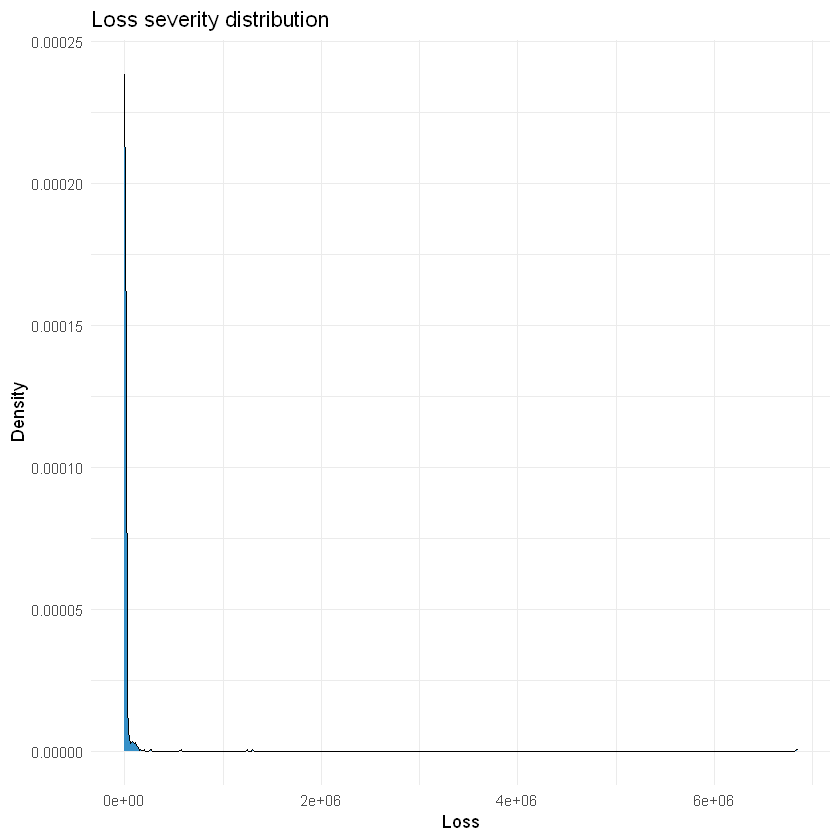

In [25]:
loss_severity <- data.frame(
loss = loss_severity
)

ggplot(loss_severity, aes(x = loss)) +
geom_density(fill="#0474BA", alpha=0.8) +
ggtitle("Loss severity distribution") +
ylab('Density') + xlab('Loss') +
theme_minimal()

**Matching the best possible distribution of operational event severity**

a) Pearson's chi-square test

H0: the data can be described by the Pearson distribution

H1: the data cannot be described by the Pearson distribution

In [26]:
chisq.test(loss_severity$loss) 


	Chi-squared test for given probabilities

data:  loss_severity$loss
X-squared = 1644488224, df = 452, p-value < 2.2e-16


The p-value is less than 0.05, which means that H0 is rejected. The observations cannot be described by the Pearson distribution.

b) Kolmogorov-Smirnov test

H0: the data can be described by a normal distribution

H1: the data cannot be described by a normal distribution

In [27]:
ks.test(loss_severity$loss, "pnorm")


	One-sample Kolmogorov-Smirnov test

data:  loss_severity$loss
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


The p-value is less than 0.05, which means that H0 is rejected. The observations cannot be described by a normal distribution.

c) Anderson-Darling test

H0: the data can be described by a normal distribution

H1: the data cannot be described by a normal distribution

In [28]:
ad.test(loss_severity$loss)


	Anderson-Darling normality test

data:  loss_severity$loss
A = 157.62, p-value < 2.2e-16


The p-value is less than 0.05, which means that H0 is rejected. The observations cannot be described by a normal distribution.

**Observing the visualizations in the task, an exponential distribution is assumed.**

## Exercise 3

**Determination of 99.9 OpVaR and 99.9 OpES using the Monte Carlo method.**

The task uses the established distribution from task 2, i.e. the exponential distribution.

In [140]:
set.seed(123) 
          
losses <- rexp(10000, rate = 1)
OpVaR <- quantile(losses, 0.999)
es_vector <- c()
for(i in 1:10000){
    if(losses[i] > OpVaR){
        es_vector <- append(es_vector, losses[i])
    }
}
OpES <- mean(es_vector)
sprintf("OpVaR: %f", OpVaR)
sprintf("OpES: %f", OpES)

[1] "OpVaR: 7.114293"

[1] "OpES: 7.814895"

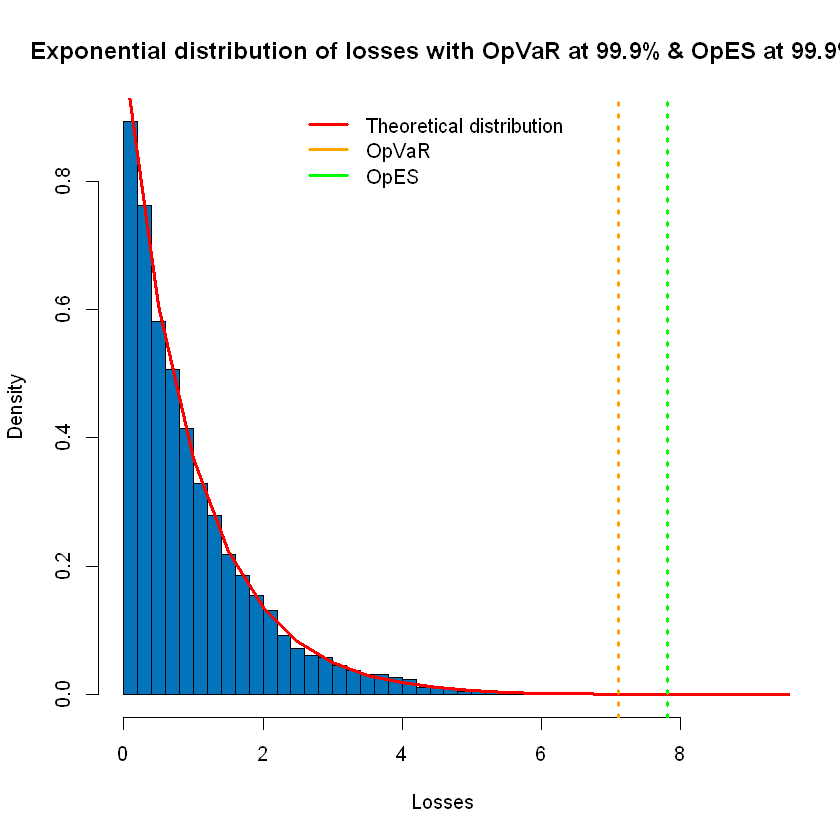

In [165]:
hist(losses,
     breaks = 50,
     freq = FALSE,
     col = '#0474BA',
     main ="Exponential distribution of losses with OpVaR at 99.9% & OpES at 99.9%",
     xlab ="Losses")

lines(seq(0, 10, by=0.5),
      dexp(xvals, rate = 1),
      lwd=3,
      col="red")

abline(v = OpVaR, lwd=3,lty = 3, col="orange")
abline(v = OpES, lwd=3, lty = 3, col="green")

legend("top", c("Theoretical distribution", "OpVaR", "OpES"),
       bty = "n", lwd = 3, col = c("red", "orange", "green"))